In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
df = pd.read_csv('D:/computer science GIU/semester 6/BigData/GIU_2718_56_7776_2022-06-01T22_41_51/Project/music_genre_dataset.csv')
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.000000,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.000000,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.000000,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.000000,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.000000,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15512,Television,Marquee Moon - Remastered,47.0,0.494,0.657,7.0,-7.543,1,0.0397,0.063200,0.449000,0.0849,0.7370,118.194,645000.000000,4,1
15513,Hulkoff,Martialisk - Svitjod Edition,39.0,0.487,0.984,1.0,-4.790,1,0.1610,0.000439,0.023400,0.3540,0.2910,120.031,225627.000000,4,8
15514,"Red Garland, Paul Chambers, Art Taylor",Almost Like Being In Love,57.0,0.561,0.346,NaN,-12.596,0,0.0409,0.873000,0.399000,0.1040,0.6970,93.689,4.838217,4,7
15515,Squid,Sludge,41.0,0.391,0.835,7.0,-4.944,1,0.0702,0.004850,0.005140,0.1180,0.1090,129.024,300820.000000,4,6


In [3]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             394
danceability             0
energy                   0
key                   1743
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3587
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [4]:
avg_price = df['Popularity'].notnull().mean()
df['Popularity'] = df['Popularity'].fillna(avg_price)

In [5]:
avg_price = df['key'].notnull().mean()
df['key'] = df['key'].fillna(avg_price)

In [6]:
avg_price = df['instrumentalness'].notnull().mean()
df['instrumentalness'] = df['instrumentalness'].fillna(avg_price)

In [7]:
df.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [8]:
# handling outliers
Q1 = df['tempo'].quantile(0.25)
Q3 = df['tempo'].quantile(0.75)
IQR = Q3 - Q1
arr_1 = df['tempo'] < (Q1 - 1.5 * IQR)
arr_2 = df['tempo'] > (Q3 + 1.5 * IQR)
tempo_out = (arr_1 | arr_2)
data = df[~(tempo_out)]
print("No. of outliers: ", tempo_out.sum())

No. of outliers:  24


In [9]:
data.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [51]:
#Query 1 calculate top 8 relax songs
relax = []
dance = []
artist_name = []
song_name = []
for i in range(15517):
    if(df.iloc[i].loudness <= -33 and df.iloc[i].danceability < 1):
        dance.append(df.iloc[i]['danceability'])
        relax.append(df.iloc[i]['loudness'])
        artist_name.append(df.iloc[i]['Artist Name'])
        song_name.append(df.iloc[i]['Track Name'])

relax_df = pd.DataFrame(
    {'Name': artist_name,
     'top relax songs': song_name,
     'loud': relax,
     'dance':dance
    })

relax_df

,Name,top relax songs,loud,dance
0,Olivia Meyer,Landsort,-36.214,0.3850
1,Nils Frahm,My Friend the Forest,-33.838,0.2530
2,"Frank Bridge, Enikő Magyar, Tadashi Imai",Berceuse (Arr. For viola and piano),-35.154,0.0882
3,Jon Hopkins,Wintergreen,-34.825,0.3060
4,"Valentin Silvestrov, Anja Lechner, Silke Avenhaus",Three Postludes (1981/82): Postlude No. 3,-39.952,0.0596
5,Carlos Cipa,Playful (variation),-34.378,0.3260
6,"Frédéric Chopin, Maria Kliegel, Bernd Glemser","Cello Sonata in G Minor, Op. 65: III. Largo",-33.082,0.0934
7,"Ludwig van Beethoven, Guido Schiefen, Alfredo ...","Cello Sonata No. 4 in C Major, Op. 102 No. 1: ...",-33.395,0.1580


<AxesSubplot:>

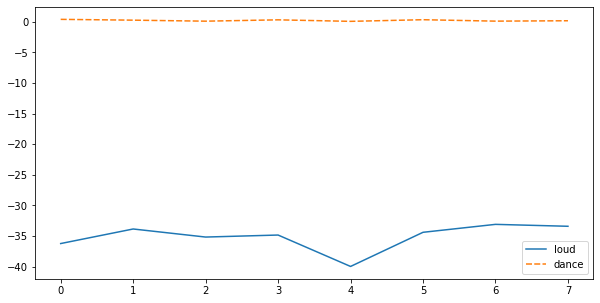

In [48]:
plt.figure(figsize=(10,5))
sns.lineplot(data=relax_df)

<AxesSubplot:xlabel='loud', ylabel='dance'>

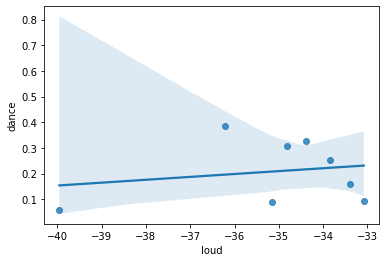

In [50]:
x = relax_df['loud']
y = relax_df['dance']
sns.regplot(x,y)

In [15]:
Gym = []
artist_name = []
song_name = []
for i in range(15517):
    if(df.iloc[i].loudness <= 2 and df.iloc[i].loudness > 0):
        Gym.append(df.iloc[i]['loudness'])
        artist_name.append(df.iloc[i]['Artist Name'])
        song_name.append(df.iloc[i]['Track Name'])

gym_df = pd.DataFrame(
    {'Artist Name': artist_name,
     'Track name': song_name,
     'gym songs': Gym,
    })
#gym_df.sort_values(by=['gym songs'])
gym_df

,Artist Name,Track name,gym songs
0,The Stooges,Search and Destroy - Iggy Pop Mix,0.878
1,Prince Rapid,Gladiator - Instrumental,0.119
2,ILLENIUM,First Time (feat. iann dior) - Kayzo Remix,0.943
3,BVDLVD,WHATS UP?,1.355
4,Justice,We Are Your Friends - Justice Vs Simian,1.342
5,Justice,We Are Your Friends - Justice Vs Simian,1.342
6,Void Of Vision,Decay,0.101
7,Dillon Francis,"Hello There - ETC!ETC! x Whyel's ""It's not a p...",0.732


In [10]:
n= len (data)
for i in range (n):
    y=data['energy'].idxmax()
    artist_name_ene=data['Artist Name'][y]
    track_name_ene=data['Track Name'][y]

    x=data['danceability'].idxmax()
    artist_name=data['Artist Name'][x]
    track_name=data['Track Name'][x]
#the most song has danceability
print ("the artist name of the maximum danceability song", track_name, "is:", artist_name)

# the most song has energy
print ("the artist name of the maximum energy song", track_name_ene, "is:", artist_name_ene)

the artist name of the maximum danceability song Gucci Umbrella is: Whookilledkenny
the artist name of the maximum energy song Transilvanian Hunger is: Darkthrone


In [60]:
# Guess song names by figuring its genre by valence and project with it artist name
sad_valence = []
artist_name_sad = []
song_name_sad = []

for i in range(15517):
    if(df.iloc[i].valence <= 0.35 and df.iloc[i].valence > 0):
        sad_valence.append(df.iloc[i]['valence'])
        artist_name_sad.append(df.iloc[i]['Artist Name'])
        song_name_sad.append(df.iloc[i]['Track Name'])
        
sad_valence_df = pd.DataFrame(
    {'Artist Name': artist_name_sad,
     'Track name': song_name_sad,
     'sad valence': sad_valence,
    })
sad_valence_df

,Artist Name,Track name,sad valence
0,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.0918
1,The Stooges,Search and Destroy - Iggy Pop Mix,0.2410
2,Randy Travis,On the Other Hand,0.3470
3,Professional Murder Music,Slow,0.3180
4,"Harald Lassen, Bram de Looze",How it feels pt. 2,0.1740
...,...,...,...
4922,Ondo Fudd,Blue Dot,0.1390
4923,Ashe,Till Forever Falls Apart,0.2830
4924,Hulkoff,Martialisk - Svitjod Edition,0.2910
4925,Squid,Sludge,0.1090


In [63]:
normal_valence = []
artist_name_normal = []
song_name_normal = []

for i in range(15517):
    if(df.iloc[i].valence > 0.35 and df.iloc[i].valence <= 0.65):
        normal_valence.append(df.iloc[i]['valence'])
        artist_name_normal.append(df.iloc[i]['Artist Name'])
        song_name_normal.append(df.iloc[i]['Track Name'])

normal_valence_df = pd.DataFrame(
    {'Artist Name': artist_name_normal,
     'Track name': song_name_normal,
     'normal valence': normal_valence,
    })
normal_valence_df

,Artist Name,Track name,normal valence
0,Boston,Hitch a Ride,0.569
1,Deno,Lingo (feat. J.I & Chunkz),0.569
2,Arctic Monkeys,The View From The Afternoon,0.417
3,Velvet Two Stripes,Drinks,0.401
4,DaBaby,Baby Sitter (feat. Offset),0.394
...,...,...,...
6238,KALI,I Just Wanna,0.510
6239,Blackberry Smoke,You Hear Georgia,0.453
6240,Make Them Suffer,Soul Decay,0.422
6241,Pop Smoke,Aim For The Moon (feat. Quavo),0.432


In [62]:
happy_valence = []
artist_name_happy = []
song_name_happy = []
for i in range(15517):
    if (df.iloc[i].valence > 0.65 and df.iloc[i].valence <= 1.0):
        happy_valence.append(df.iloc[i]['valence'])
        artist_name_happy.append(df.iloc[i]['Artist Name'])
        song_name_happy.append(df.iloc[i]['Track Name'])
        
happy_valence_df = pd.DataFrame(
    {'Artist Name': artist_name_happy,
     'Track name': song_name_happy,
     'happy valence': happy_valence,
    })
happy_valence_df

,Artist Name,Track name,happy valence
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.899
1,The Raincoats,No Side to Fall In,0.787
2,Solomon Burke,None Of Us Are Free,0.677
3,Mohammed Rafi,Meri Dosti Mera Pyar,0.843
4,Buffalo Springfield,For What It's Worth,0.822
...,...,...,...
4342,TOTO,Africa,0.732
4343,Tricky,Chills Me to the Bone,0.675
4344,The J. Geils Band,Centerfold,0.888
4345,Television,Marquee Moon - Remastered,0.737


<AxesSubplot:>

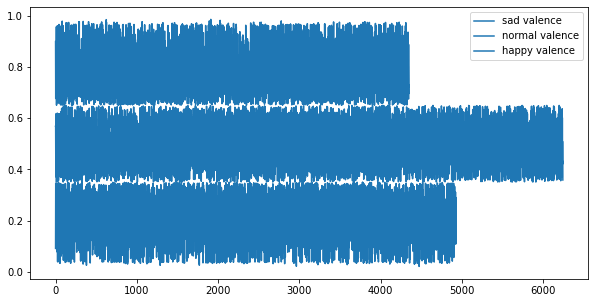

In [64]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sad_valence_df)
sns.lineplot(data=normal_valence_df)
sns.lineplot(data=happy_valence_df)

In [ ]:
df.nsmallest(7,['danceability'])

In [52]:
import findspark
findspark.init()

In [53]:
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [55]:
spark = SparkSession.builder.appName('music_lr').getOrCreate()

KeyboardInterrupt: 

In [54]:
df_spark = spark.read.csv('D:/computer science GIU/semester 6/BigData/GIU_2718_56_7776_2022-06-01T22_41_51/Project/music_genre_dataset.csv', header = True, inferSchema = True)

KeyboardInterrupt: 

In [ ]:
featurizationPipeline = Pipeline(stages = [VectorAssembler(inputCols=numericCols, outputCol="feature_vector")])
featurizationPipelineModel = featurizationPipeline.fit(df_spark)
df_spark = featurizationPipelineModel.transform(df_spark)

In [ ]:
train, test = df_spark.randomSplit([0.8, 0.2], seed = 2018)

In [ ]:
df.show(10)